# Technical description

- **Test Name:** recommender_system_test
- **Groups:** A (control), B (new payment funnel)
- **Start Date:** 12-07-2020
- **Date when they stopped receiving new users:** 12-21-2020
- **End Date:** 01-01-2021
- **Audience:** 15% of new users from the EU region
- **Test Purpose:** Testing changes related to the introduction of an improved recommendation system
- **Expected Outcome:** Within 14 days after registration, users are expected to show better conversion rates in product page views (the event product_page event), adding items to the cart (product_cart), and purchases (purchase). At each step of the funnel product_page → product_cart → purchase, there will be at least a 10% increase.
- **Expected Number of Test Participants:** 6000





# Data description

**ab_project_marketing_events_us.csv** — Marketing Events Calendar for 2020

- **name**: Name of the marketing events
- **regions**: Regions where the campaign will be conducted
- **start_dt**: Start date of the campaign
- **finish_dt**: End date of the campaign

**final_ab_new_users_upd_us.csv** — All Users who Registered on the Online Store (December 7 to 21, 2020)

- **user_id**
- **first_date**: Registration date
- **region**
- **device**: Device used for registration

**final_ab_events_upd_us.csv** — All Events of New Users (December 7, 2020, to January 1, 2021)

- **user_id**
- **event_dt**: Date and time of the event
- **event_name**: Name of the event source
- **details**: Additional data about the event (e.g., total order amount in USD for purchase events)

**final_ab_participants_upd_us.csv** — Test Participants

- **user_id**
- **ab_test**: Test name
- **group**: Test group to which the user belonged

# Decomposition



1. <b>Project objectives</b>: Defining what we would like to achieve at the end of this project.
2. <b>Standardize data</b>: Review column data types to achieve good manipulation of data.
3. <b>Missing values</b>: I will treat missing values in accord with the size of them compared with total data set, they can be deleted or filled in order to obtain a solid data set.
4. <b>Duplicated values</b>: I will treat them depending on quantity of duplicates in relation with total data.
5. <b>Enhance data</b>: In this process will add columns that will be relevant for our analysis and merge datasets.
6. <b>Conversion rates</b>: Analyze conversion rate between events.
7. <b>Events</b>: Find if events by user is equally distributed, how number of events is distributed by day.
8. <b>Sample</b>: Find if there is users per sample.
9. <b>A/B test</b>: Conclusion of A/B test results.
10. <b>Statistic test</b>: Apply a statistic test to verify statistic difference ansd proportions.
11. <b>Conclusion</b>: General conclusion of analysis and A/B test.

# Objectives

* Experiment confiability analisys
  
* What conclusions we can take from it

# Initializing

## libraries

In [12]:
#loading libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rainbow')
sns.color_palette('Paired')
sns.set_context('talk')

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency


## loading files

In [14]:
try:
    ab_events = pd.read_csv("/datasets/final_ab_events_upd_us.csv")

except FileNotFoundError:
    ab_events = pd.read_csv("final_ab_events_upd_us.csv")

In [15]:
try:
    ab_new_users = pd.read_csv("/datasets/final_ab_new_users_upd_us.csv")

except FileNotFoundError:
    ab_new_users = pd.read_csv("final_ab_new_users_upd_us.csv")

In [16]:
try:
    ab_participants = pd.read_csv("/datasets/final_ab_participants_upd_us.csv")

except FileNotFoundError:
    ab_participants = pd.read_csv("final_ab_participants_upd_us.csv")

In [17]:
try:
    ab_mkt = pd.read_csv("/datasets/ab_project_marketing_events_us.csv")

except FileNotFoundError:
    ab_mkt = pd.read_csv("ab_project_marketing_events_us.csv")

In [18]:
ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [19]:
ab_events.shape

(423761, 4)

In [20]:
ab_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


     missing values found in details column, event_dt type need adjust

In [22]:
ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [23]:
ab_new_users.shape

(58703, 4)

In [24]:
ab_new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


    no missing values found, date column type need adjust

In [26]:
ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [27]:
ab_participants.shape

(14525, 3)

In [28]:
ab_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


    no missing values found

In [30]:
ab_mkt.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [31]:
ab_mkt.shape

(14, 4)

In [32]:
ab_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


    no missing values, dates type need adjust

## functions

In [35]:
#function to calculate percentage
def per_calc(value, total):
    if total == 0:
        return 0 
    else:
        return(value/total) * 100
        

# Pre processing

## standarizing

In [38]:
#changing data type to datetime in 'event_dt'
ab_events['event_dt'] = pd.to_datetime(ab_events['event_dt'])

In [39]:
#changing data type to datetime in 'first_date'
ab_new_users['first_date'] = pd.to_datetime(ab_new_users['first_date'])

In [40]:
#changing data type to datetime in 'start_dt'
ab_mkt['start_dt'] = pd.to_datetime(ab_mkt['start_dt'])

In [41]:
#changing data type to datetime in 'finish_dt'
ab_mkt['finish_dt'] = pd.to_datetime(ab_mkt['finish_dt'])

## missing values

In [43]:
#unique values in 'details'
ab_events['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [44]:
#calculating percentage of values missing
ab_events.isna().mean() * 100

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64

    85% of data in details are missing

In [46]:
ab_events.groupby('event_name')['details'].count()

event_name
login               0
product_cart        0
product_page        0
purchase        60314
Name: details, dtype: int64

In [47]:
ab_events.groupby('event_name')['user_id'].count()

event_name
login           182465
product_cart     60120
product_page    120862
purchase         60314
Name: user_id, dtype: int64

    details data only shown at purchase event, which makes sense.

In [49]:
#filling n/a values with 0
ab_events['details'].fillna(0, inplace=True)

In [50]:
ab_events.isna().mean() * 100

user_id       0.0
event_dt      0.0
event_name    0.0
details       0.0
dtype: float64

    n/a values in details filled with 0

## duplicates

In [53]:
#counting duplicated ab_events
ab_events.duplicated().value_counts()

False    423761
Name: count, dtype: int64

    no duplicated values found in ab_avents

In [55]:
#checking for duplicated 'user_id'
ab_new_users['user_id'].duplicated().value_counts()

user_id
False    58703
Name: count, dtype: int64

    no repetition of users indicates concise data regarding new users

In [57]:
#counting duplicated in ab_new_users
ab_new_users.duplicated().value_counts()

False    58703
Name: count, dtype: int64

    no duplicated values found in ab_new_users

In [59]:
#counting duplicated in ab_participants
ab_participants.duplicated().value_counts()

False    14525
Name: count, dtype: int64

    no duplicated values found in ab_participants

In [61]:
ab_mkt.duplicated().value_counts()

False    14
Name: count, dtype: int64

    no duplicated values found in ab_mkt

## enhancing data

In [64]:
ab_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [65]:
#adding date column
ab_events['date'] = ab_events['event_dt'].dt.date

In [66]:
ab_events['day'] = ab_events['event_dt'].dt.day

In [67]:
ab_events['week'] = ab_events['event_dt'].dt.isocalendar().week

In [68]:
ab_events['month'] = ab_events['event_dt'].dt.month

## merging tables

In [70]:
ab_events.head()

,user_id,event_dt,event_name,details,date,day,week,month
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,7,50,12
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,7,50,12
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,7,50,12
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,7,50,12
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,7,50,12


In [71]:
ab_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [72]:
ab_new_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [73]:
#merging new users and participants
new_users_participants = ab_participants.merge(ab_new_users, on='user_id', how='left')
new_users_participants.head()

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,4FF2998A348C484F,A,recommender_system_test,2020-12-20,EU,Mac


In [74]:
new_users_participants.isna().mean()*100

user_id       0.0
group         0.0
ab_test       0.0
first_date    0.0
region        0.0
device        0.0
dtype: float64

    no missing values found after merging

In [76]:
new_users_participants.duplicated().value_counts()

False    14525
Name: count, dtype: int64

    no duplicates found

In [78]:
#merging events and new users participants table
events_participants = ab_events.merge(new_users_participants, on='user_id', how='left')

In [79]:
#calculating N/A values in new merged table
events_participants.isna().mean()*100

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details        0.000000
date           0.000000
day            0.000000
week           0.000000
month          0.000000
group         76.055007
ab_test       76.055007
first_date    76.055007
region        76.055007
device        76.055007
dtype: float64

    only 23.95% of all data has participated the a/b test, will only use this data for analysis

In [81]:
#dropping users that did not participate test
events_participants.dropna(subset=['group','ab_test','first_date', 'region', 'device'], inplace=True)

In [82]:
#calculating N/A values left 
events_participants.isna().mean()*100

user_id       0.0
event_dt      0.0
event_name    0.0
details       0.0
date          0.0
day           0.0
week          0.0
month         0.0
group         0.0
ab_test       0.0
first_date    0.0
region        0.0
device        0.0
dtype: float64

In [83]:
events_participants.shape

(102838, 13)

In [84]:
events_participants

,user_id,event_dt,event_name,details,date,day,week,month,group,ab_test,first_date,region,device
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,iPhone
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,7,50,12,A,recommender_system_test,2020-12-07,EU,Android
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Android
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Mac
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,PC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
429448,75845C83258FBF73,2020-12-30 06:42:52,login,0.00,2020-12-30,30,53,12,B,recommender_system_test,2020-12-07,EU,Android
429450,4584E51B99DE51AE,2020-12-30 07:39:32,login,0.00,2020-12-30,30,53,12,A,interface_eu_test,2020-12-07,EU,Mac
429451,9DF4F595A906A0BA,2020-12-30 18:28:55,login,0.00,2020-12-30,30,53,12,B,interface_eu_test,2020-12-07,EU,Android
429470,6181F3835EBE66BF,2020-12-30 12:00:00,login,0.00,2020-12-30,30,53,12,A,interface_eu_test,2020-12-07,EU,Android


# Analysis

## ab_events

In [87]:
#nunique group per day
users_per_day = ab_events.groupby('date')['user_id'].nunique().mean()
users_per_day

7940.521739130435

    average of 7940 users per day

In [89]:
#nunique group per week
users_per_week = ab_events.groupby('week')['user_id'].nunique().mean()
users_per_week

26396.75

    average of 26396 per week    

In [91]:
users_per_month = ab_events.groupby('month')['user_id'].nunique().mean()
users_per_month

58703.0

    average of 58703 users per month

In [93]:
daily_total = ab_events.groupby('date')['user_id'].count().mean()
daily_total

18424.391304347828

    average of 18424 daily access

## events_participants

In [96]:
events_participants.head()

,user_id,event_dt,event_name,details,date,day,week,month,group,ab_test,first_date,region,device
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,iPhone
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,7,50,12,A,recommender_system_test,2020-12-07,EU,Android
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Android
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Mac
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,PC


In [97]:
events_participants['ab_test'].unique()

array(['interface_eu_test', 'recommender_system_test'], dtype=object)

In [98]:
events_participants.groupby('event_name')['user_id'].nunique()

event_name
login           13636
product_cart     4394
product_page     8923
purchase         4563
Name: user_id, dtype: int64

In [99]:
#grouping by a/b test group
grouped = events_participants.groupby('group', as_index=False)['user_id'].nunique().rename(columns={'user_id':'count'})

In [100]:
#adding percentage column
grouped['percentage'] = per_calc(grouped['count'], grouped['count'].sum())
grouped

,group,count,percentage
0,A,7874,55.927268
1,B,6205,44.072732


    there is a difference of almost 12% between groups but there is 2 different interfaces being tested, I will filter them by it.

### time frame

In [103]:
#when test started
events_participants['date'].min()

datetime.date(2020, 12, 7)

In [104]:
#when test finished
events_participants['date'].max()

datetime.date(2020, 12, 30)

In [105]:
#days of test
events_participants['date'].max() - events_participants['date'].min()

datetime.timedelta(days=23)

### eu_test

In [107]:
#querying ab test interface_eu_test
eu_test_participants = events_participants.query('ab_test == "interface_eu_test"')
eu_test_participants.head()

,user_id,event_dt,event_name,details,date,day,week,month,group,ab_test,first_date,region,device
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,iPhone
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Android
11,354D653172FF2A2D,2020-12-07 15:45:11,purchase,4.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Mac
12,7FCD34F47C13A9AC,2020-12-07 22:06:13,purchase,9.99,2020-12-07,7,50,12,B,interface_eu_test,2020-12-07,EU,PC
13,0313C457F07C339E,2020-12-07 13:10:48,purchase,9.99,2020-12-07,7,50,12,A,interface_eu_test,2020-12-07,EU,Mac


In [108]:
#how many of users
ab_eu = eu_test_participants.groupby('group')['user_id'].nunique().reset_index().rename(columns={'user_id':'count'})

In [109]:
#adding percentage column
ab_eu['percentage'] = per_calc(ab_eu['count'], ab_eu['count'].sum())
ab_eu

,group,count,percentage
0,A,5467,50.387097
1,B,5383,49.612903


    very small difference of users per group, this is positive

In [111]:
#grouping counts of users by event
ab_eu_events = eu_test_participants.groupby('event_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'count'}).sort_values(by='count',ascending=False)
ab_eu_events

,event_name,count
0,login,10849
2,product_page,7166
3,purchase,3713
1,product_cart,3568


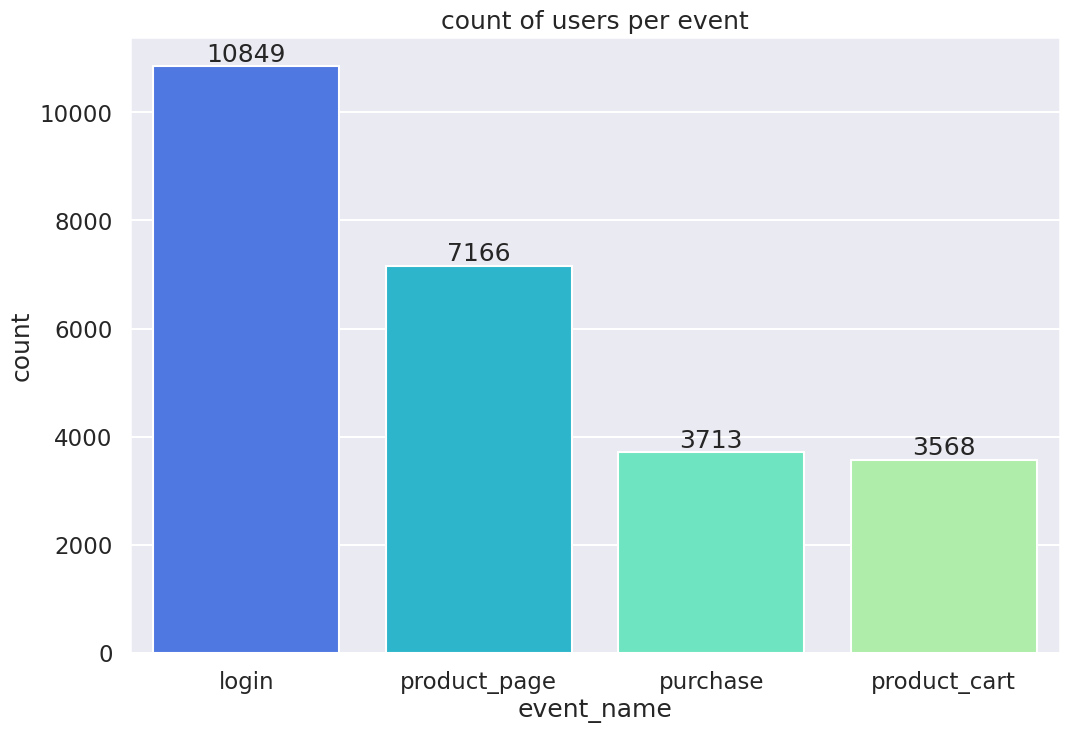

In [112]:
#count of users per event plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data=ab_eu_events, x='event_name', y='count')
plt.title('count of users per event')
for i, count in enumerate(ab_eu_events['count']):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')
plt.show()

    product_cart events count is smaller than purchase, showing some customers bought without going through product_cart event

In [114]:
#login conversion rate
login_conversion_eu = (ab_eu_events.loc[ab_eu_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_eu_events.loc[ab_eu_events['event_name'] == 'login', 'count'].iloc[0]) * 100
login_conversion_eu

34.22435247488248

    conversion rate of 34.2% from login to purchase

In [116]:
#product page conversion rate
prod_page_conversion_eu = (ab_eu_events.loc[ab_eu_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_eu_events.loc[ab_eu_events['event_name'] == 'product_page', 'count'].iloc[0]) * 100
prod_page_conversion_eu

51.814122243929674

    conversion rate of 51.8% from product_page to purchase

In [118]:
#product cart conversion rate
prod_cart_conversion_eu = (ab_eu_events.loc[ab_eu_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_eu_events.loc[ab_eu_events['event_name'] == 'product_cart', 'count'].iloc[0]) * 100
prod_cart_conversion_eu

104.06390134529148

    4% of purchases were done without passing through product_cart event

### recommender_system_test

In [121]:
#querying ab test interface_eu_test
system_test_participants = events_participants.query('ab_test == "recommender_system_test"')
system_test_participants.head()

,user_id,event_dt,event_name,details,date,day,week,month,group,ab_test,first_date,region,device
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,7,50,12,A,recommender_system_test,2020-12-07,EU,Android
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,7,50,12,A,recommender_system_test,2020-12-07,EU,PC
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,7,50,12,B,recommender_system_test,2020-12-07,EU,iPhone
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,2020-12-07,7,50,12,A,recommender_system_test,2020-12-07,EU,PC
75,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,2020-12-07,7,50,12,B,recommender_system_test,2020-12-07,EU,PC


In [122]:
#how many of users
ab_system = system_test_participants.groupby('group')['user_id'].nunique().reset_index().rename(columns={'user_id':'count'})

In [123]:
#adding percentage column
ab_system['percentage'] = per_calc(ab_system['count'], ab_system['count'].sum())
ab_system

,group,count,percentage
0,A,2747,74.748299
1,B,928,25.251701


    there is a high risk of bias in this results

In [125]:
#grouping counts of users by event
ab_system_events = system_test_participants.groupby('event_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'count'}).sort_values(by='count',ascending=False)
ab_system_events

,event_name,count
0,login,3674
2,product_page,2303
3,purchase,1128
1,product_cart,1079


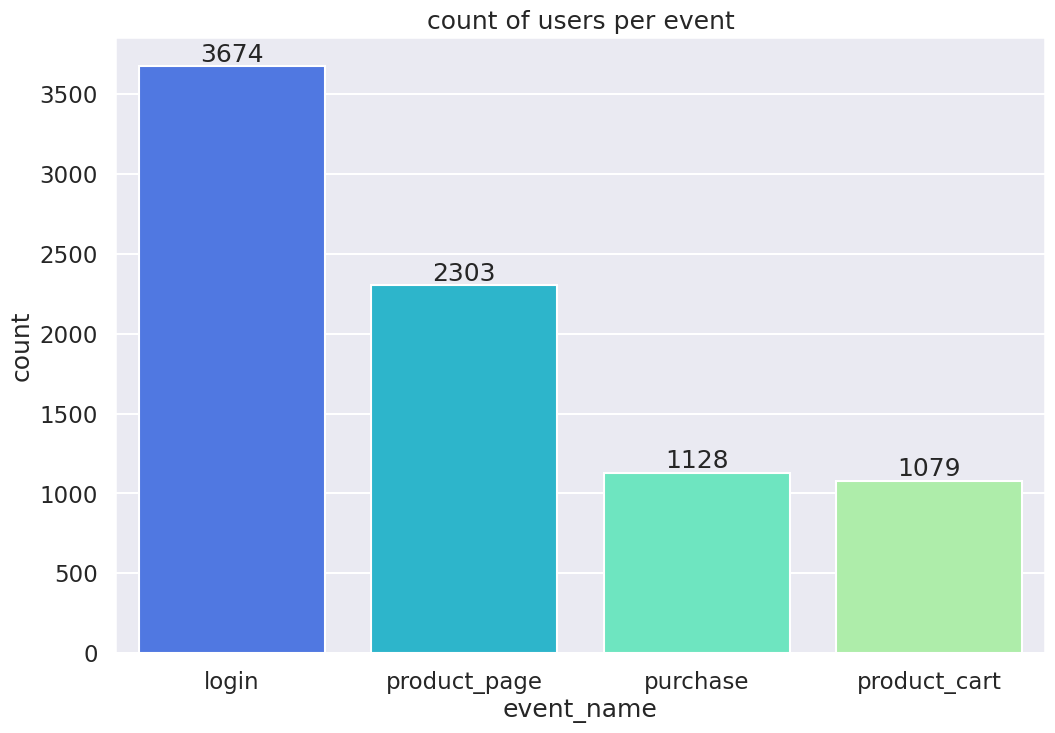

In [126]:
#count of users per event plot
plt.figure(figsize=(12,8))
ax = sns.barplot(data=ab_system_events, x='event_name', y='count')
plt.title('count of users per event')
for i, count in enumerate(ab_system_events['count']):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')
plt.show()

    same as seen on previous graphic product_cart is higher than purchase

In [128]:
#login conversion rate
login_conversion = (ab_system_events.loc[ab_system_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_system_events.loc[ab_system_events['event_name'] == 'login', 'count'].iloc[0]) * 100
login_conversion

30.70223189983669

    conversion rate of 30.7% from login to purchase

In [130]:
#product page conversion rate
prod_page_conversion = (ab_system_events.loc[ab_system_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_system_events.loc[ab_system_events['event_name'] == 'product_page', 'count'].iloc[0]) * 100
prod_page_conversion

48.97959183673469

    conversion rate of 48.9% from product page event to purchase

In [132]:
#product cart conversion rate
prod_cart_conversion = (ab_system_events.loc[ab_system_events['event_name'] == 'purchase', 'count'].iloc[0] / ab_system_events.loc[ab_system_events['event_name'] == 'product_cart', 'count'].iloc[0]) * 100
prod_cart_conversion

104.5412418906395

    4% of purchase did not pass through product_cart event

### compared conversion rate by interface

In [135]:
#recommender_system - eu_test
login_conversion - login_conversion_eu

-3.52212057504579

    eu test conversion from login is 3.52% higher than recommender system

In [137]:
#recommender_system - eu_test
prod_page_conversion - prod_page_conversion_eu

-2.8345304071949826

    eu test conversion from login is 2.83% higher than recommender system

In [139]:
prod_cart_conversion - prod_cart_conversion_eu

0.47734054534801373

     small difference on conversion rate but the percentage noth interfaces test had their percentage higher than the event before

## event vs day distribution

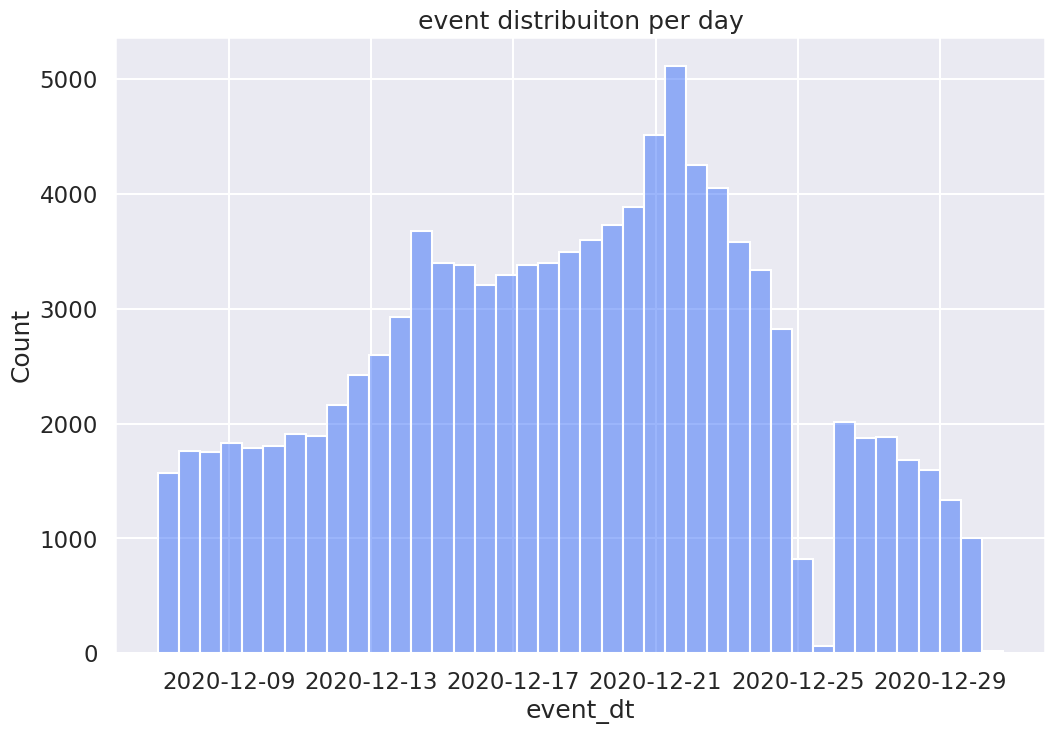

In [142]:
plt.figure(figsize=(12,8))
sns.histplot(data=events_participants, x='event_dt', bins=40, alpha=0.5)
plt.title('event distribuiton per day')
plt.show()

    it looks normal distributed with peak on 22nd of december, drop on 24th and 25th december due to christmas. accesses back to normal on 26th.

# A/B test Analysis

In [145]:
#defining alpha 
alpha = 0.05

## system interface

* <b>H0: There is NO significant difference between group A and B for all events</b>

* <b>H1: There is a significant difference between group A and B for all events</b>

In [148]:
#pivot table group events
ab_pivot_system = system_test_participants.pivot_table(index='event_name', values='user_id', columns='group', aggfunc='nunique').reset_index()
ab_pivot_system

group,event_name,A,B
0,login,2747,927
1,product_cart,824,255
2,product_page,1780,523
3,purchase,872,256


In [154]:
#running chi2 test for each event group 246 and 248
group = ['A','B']
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(ab_pivot_system[group])

if p_val < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


## eu interface

* <b>H0: There is NO significant difference between group A and B for all events</b>

* <b>H1: There is a significant difference between group A and B for all events</b>

In [158]:
#pivot table group events
ab_pivot_eu = eu_test_participants.pivot_table(index='event_name', values='user_id', columns='group', aggfunc='nunique').reset_index()
ab_pivot_eu

group,event_name,A,B
0,login,5466,5383
1,product_cart,1756,1812
2,product_page,3639,3527
3,purchase,1931,1782


In [162]:
#running chi2 test for each event group 246 and 248
group = ['A','B']
 
#perform chi-square test for the current event
chi2_stat, p_val, dof, expected = chi2_contingency(ab_pivot_eu[group])

if p_val < alpha:
    print('Reject null hypotesis')
else:
    print(" We can't reject null hypotesis")

 We can't reject null hypotesis


## conclusion

 Based on the results of the chi-square test, which indicated that we cannot reject the null hypothesis, I conclude that there is no significant difference between group A and group B for all events. 
 
 Therefore, there is insufficient evidence to support the alternative hypothesis, suggesting that there is a significant difference between the two groups for all events.
 
  This implies that, based on the data analyzed, the performance of group A and group B across the events examined appears to be similar for both interfaces

# Project conclusion

* The number of events was well distributed between the samples.
* There was users in both samples.
* There was good distribution between dates but the fact test was done on Christmas period might have affected result.
* Even though we found a large group difference on eu interface test to system I ran the chi square test for both. Both tests could not reject null hypothesis.

 